# Instance Segmentation
In this notebook we will have a look instance segmenation with the Pennfudan dataset using different dashboards.

In [1]:
# Imports
import pathlib

import panel as pn

from icevision.all import *
import icedata
from icevision_dashboards.dashboards import *
from icevision_dashboards.data import *

In [2]:
pn.extension()

# Setup data
First we load the data in the typical icevision fashion

In [3]:
# Load the Fridge dataset
path = icedata.pennfudan.load_data()

# parse the data
parser = icedata.pennfudan.parser(data_dir=path)
# we just want to have a look at the data so we don't split the data
records = parser.parse(RandomSplitter([1]))[0]

# get the class map
class_map = records[0].detection.class_map

  0%|          | 0/170 [00:00<?, ?it/s]

INFO     - Autofixing records | icevision.parsers.parser:parse:136


  0%|          | 0/170 [00:00<?, ?it/s]

## Prepare the data for the dashboard
To use the records with various dashboards we need to first create dataset that contains all the required data. For this the `InstanceSegmentationDataset` can be used (to learn more about `datasets` and `dashboards` take a look at the notebooks: N1, N2), it takes a list of records and calulates different statistics which can be used by the dashboards.

In [4]:
# create a dataset that can be consumed by a dashboard
# use the class map for nicer representation
pennfudan_ds = InstanceSegmentationRecordDataset(records, class_map)

The overview has four tabs that display different information about the dataset.

1. Dataset stats: General statistics about the dataset (images, and classes)
2. Annotations: Plots to investigate the distributions of diffrent aspects
3. Gallery: A sortable gallery of the images in the dataset
4. Dataset: A table containing the reach annotation as a row and corrospoinding stats as the columns

Tabs
    [0] Column
        [0] Markdown(str)
        [1] DataFrame(formatters={'no_imgs': HTMLTemplateFo...}, height=100, selection=[0], sizing_mode='fixed', value=   no_imgs  no_classes  ..., width=1200)
        [2] Markdown(str)
        [3] DataFrame(formatters={'Num. imgs.': HTMLTemplat...}, height=100, selection=[0], sizing_mode='fixed', value=   Num. imgs.  ..., width=1200)
        [4] Markdown(str)
        [5] DataFrame(formatters={'Class': HTMLTemplateForm...}, height=175, selection=[0], sizing_mode='fixed', value=    Class  avg_objects_per..., width=1200)
        [6] Row(align='center')
            [0] Bokeh(Figure)
    [1] GridSpec(align='center', height=700, ncols=2, nrows=2, sizing_mode='fixed', width=1200)
        [0] Column(height=350, width=600)
            [0] Markdown(str)
            [1] Bokeh(Figure)
        [1] Column(height=350, width=600)
            [0] Markdown(str)
            [1] Bokeh(Figure)
        [2] Column(align='center', height=700, width=600)
            [0] Column
                [0] Column(align='center')
                    [0] Row(width=600)
                        [0] Select(name='X-Axis', options=['num_annotations', ...], value='num_annotations')
                        [1] Select(name='Y-Axis', options=['label', 'num_annotations...], value='label')
                    [1] Row(width=600)
                        [0] Checkbox(name='X is categorical')
                        [1] Checkbox(name='Normalize rows')
                        [2] IntInput(end=10, name='Precision', start=0, value=2)
                    [2] Row(width=600)
                        [0] RangeSlider(end=8, name='X-Axis Range', start=1, step=0.14, value=(1, 8))
                        [1] IntInput(end=500, name='Bins', start=1, value=10)
                [1] ParamFunction(function)
    [2] Column
        [0] IntInput(height=50, name='Number of aspect ratios', sizing_mode='fixed', value=3, width=1200)
        [1] IntInput(height=50, name='Bins', sizing_mode='fixed', value=30, width=1200)
        [2] ParamFunction(function)
    [3] Column(align='center', sizing_mode='stretch_both')
        [0] Column
            [0] Row(align='center', height=50)
                [0] Button(name='<', width=166)
                [1] TextInput(value='1', width=83)
                [2] Row(width=83)
                    [0] Markdown(str)
                [3] Button(name='>', width=166)
            [1] Row(align='center')
                [0] Bokeh(Figure)
    [4] DataFrame(formatters={'id': HTMLTemplateFormatt...}, height=700, selection=[0], sizing_mode='fixed', value=      id  width  height   ..., width=1200)
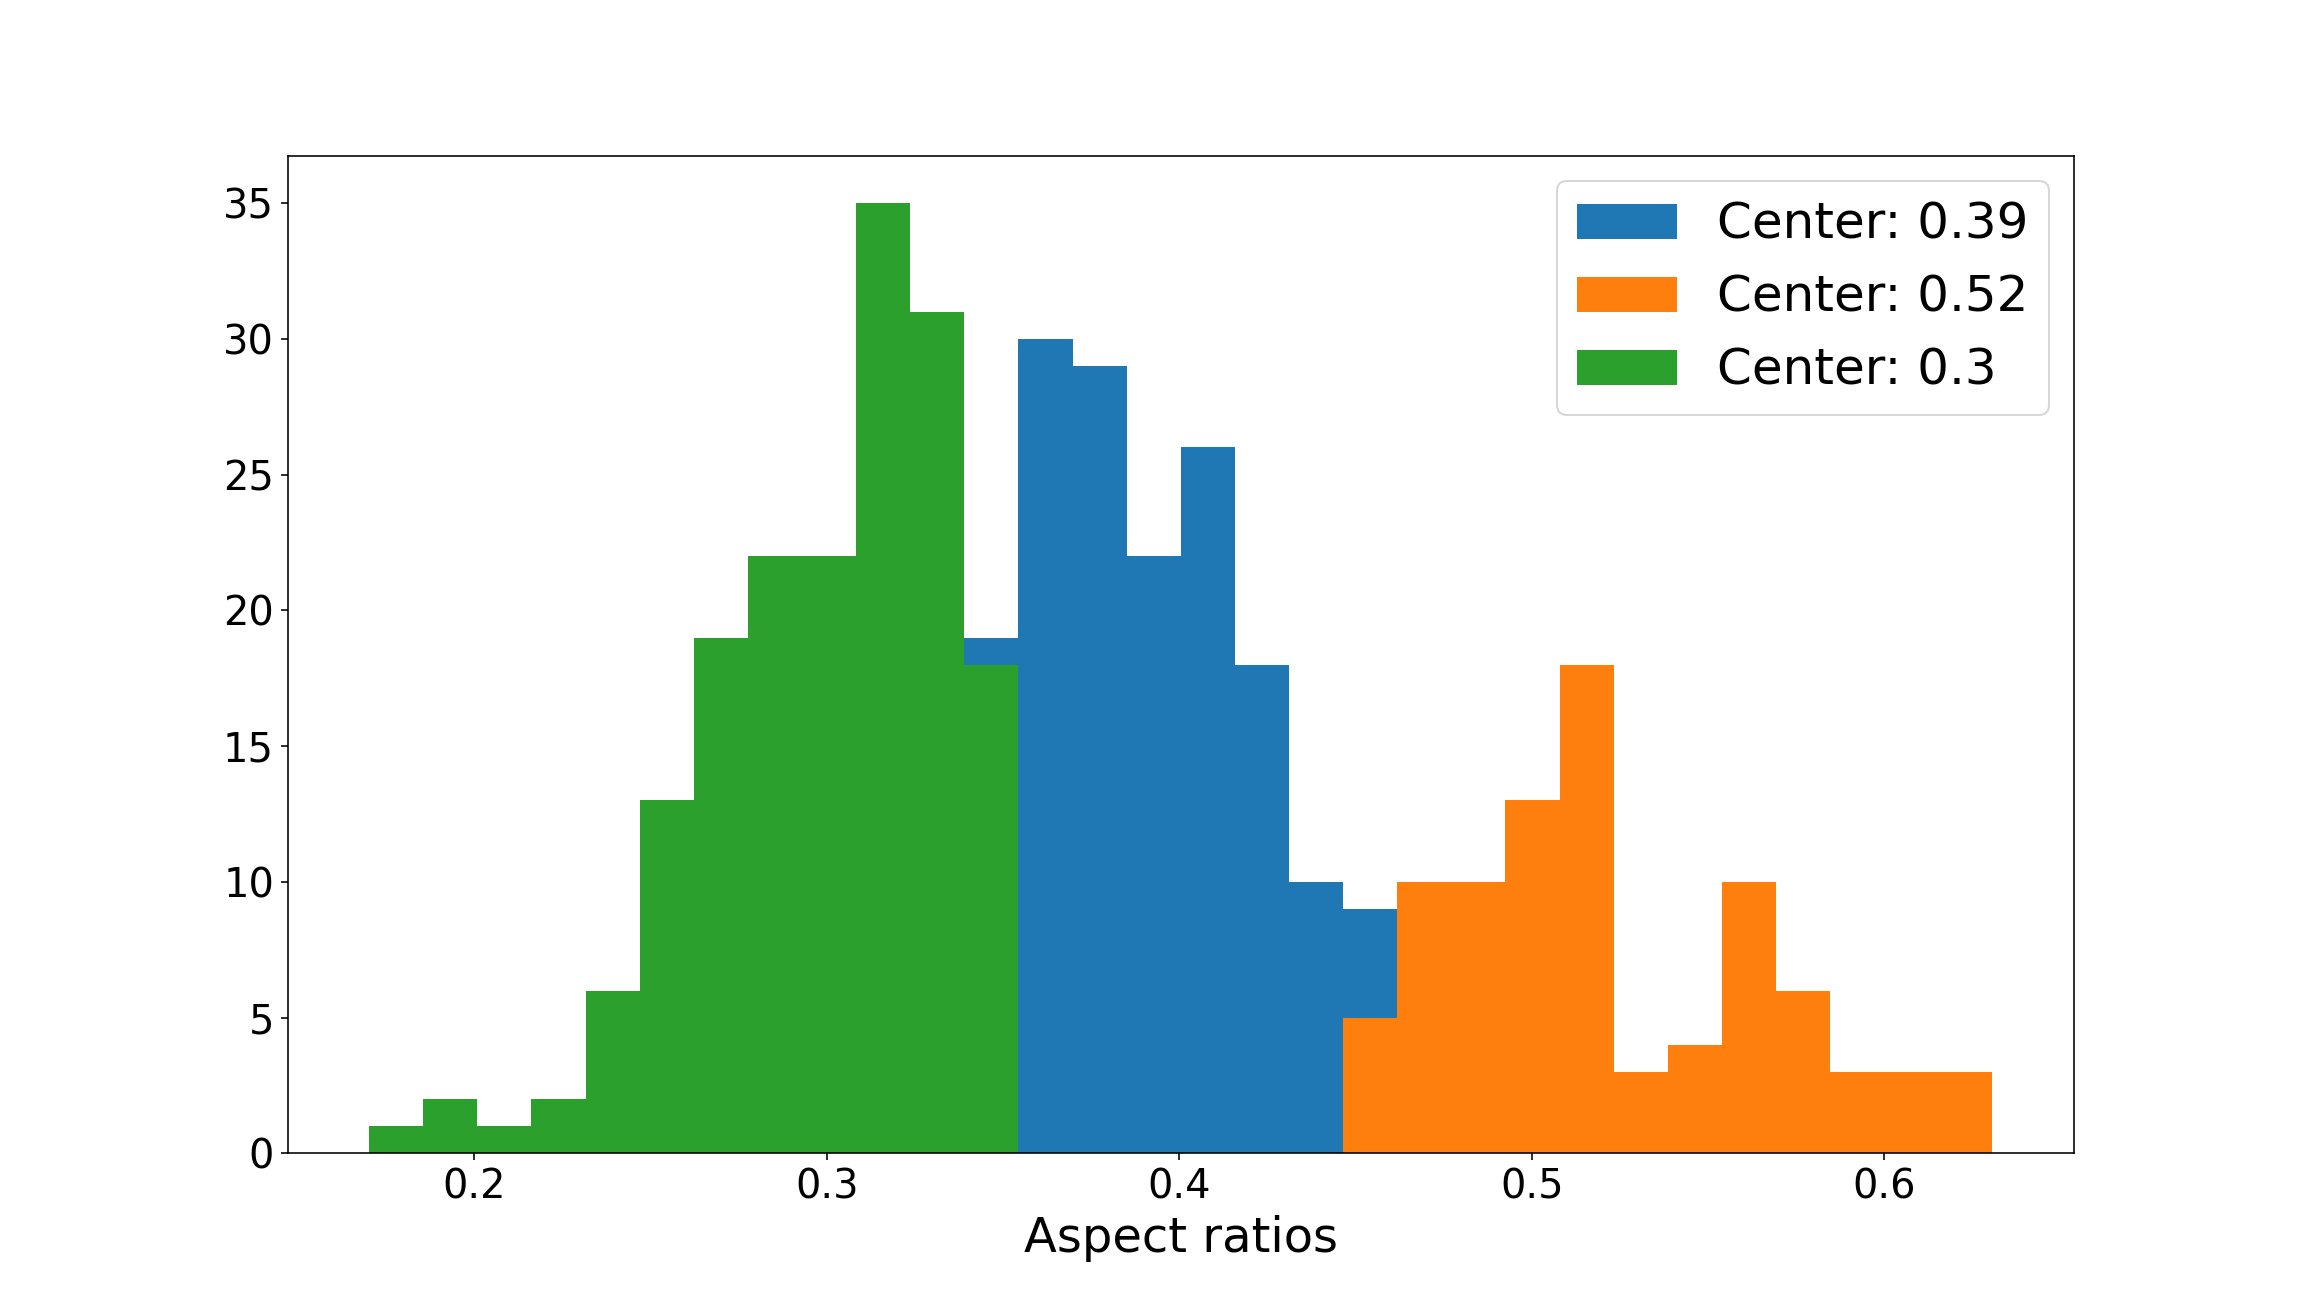

In [5]:
# create dashboard that gives us an overview of the dataset
pennfudan_overview = InstanceSegmentationDatasetOverview(pennfudan_ds, 700, 1200)
# each dashboard has a show function to display the dashboard
# if only a list with text is showing you might have forgotten to run pn.extension() in a cell
pennfudan_overview.show()

# Comparing datasets
We split the records into training and validation records and compare the two datasets. The comparison dashboard is very similar to the Overview dashboard but it links all plots the make them comparable. 

In [6]:
# lets split the data and compare the two
train_records, valid_records = parser.parse()

  0%|          | 0/170 [00:00<?, ?it/s]

INFO     - Autofixing records | icevision.parsers.parser:parse:136


  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

In [7]:
# create two datasets for the comparison dashboard
dash_ds_train = BboxRecordDataset(train_records, class_map)
dash_ds_valid = BboxRecordDataset(valid_records, class_map)

In [8]:
# create the comparison dashboard and display it
comparison_dashboard = InstanceSegmentationDatasetComparison([dash_ds_train, dash_ds_valid], 500, 1500)
comparison_dashboard.show()

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Row
            [0] DataFrame(formatters={'Dataset_0': HTMLTemplate...}, height=50, selection=[0], sizing_mode='fixed', value=   Dataset_0  ..., width=500)
        [2] Markdown(str)
        [3] Row
            [0] DataFrame(formatters={'no_imgs': HTMLTemplateFo...}, height=71, selection=[0], sizing_mode='fixed', value=   no_imgs  no_classes  ..., width=750)
            [1] DataFrame(formatters={'no_imgs': HTMLTemplateFo...}, height=71, selection=[0], sizing_mode='fixed', value=   no_imgs  no_classes  ..., width=750)
        [4] Markdown(str)
        [5] Row
            [0] DataFrame(formatters={'Num. imgs.': HTMLTemplat...}, height=71, selection=[0], sizing_mode='fixed', value=   Num. imgs.  ..., width=750)
            [1] DataFrame(formatters={'Num. imgs.': HTMLTemplat...}, height=71, selection=[0], sizing_mode='fixed', value=   Num. imgs.  ..., width=750)
        [6] Markdown(str)
        [7] Row
            [0] DataFrame(formatters={'Class': HTMLTemplateForm...}, height=125, selection=[0], sizing_mode='fixed', value=    Class  avg_objects_per..., width=750)
            [1] DataFrame(formatters={'Class': HTMLTemplateForm...}, height=125, selection=[0], sizing_mode='fixed', value=    Class  avg_objects_per..., width=750)
        [8] Row(align='center')
            [0] Bokeh(Figure)
            [1] Bokeh(Figure)
    [1] Row(align='center')
        [0] ParamFunction(function)
        [1] Column
            [0] Column(align='center')
                [0] Row(width=375)
                    [0] Select(name='X-Axis', options=['num_annotations', ...], value='num_annotations')
                    [1] Select(name='Y-Axis', options=['label', 'num_annotations...], value='label')
                [1] Row(width=375)
                    [0] Checkbox(name='X is categorical')
                    [1] Checkbox(name='Normalize rows')
                    [2] IntInput(end=10, name='Precision', start=0, value=2)
                [2] Row(width=375)
                    [0] RangeSlider(end=8, name='X-Axis Range', start=1, step=0.14, value=(1, 8))
                    [1] IntInput(end=500, name='Bins', start=1, value=10)
            [1] ParamFunction(function)
    [2] Row(sizing_mode='stretch_both')
        [0] Column
            [0] Row(align='center', height=50)
                [0] Button(name='<', width=250)
                [1] TextInput(value='1', width=125)
                [2] Row(width=125)
                    [0] Markdown(str)
                [3] Button(name='>', width=250)
            [1] Row(align='center')
                [0] Bokeh(Figure)
        [1] Column
            [0] Row(align='center', height=50)
                [0] Button(name='<', width=250)
                [1] TextInput(value='1', width=125)
                [2] Row(width=125)
                    [0] Markdown(str)
                [3] Button(name='>', width=250)
            [1] Row(align='center')
                [0] Bokeh(Figure)
    [3] Row
        [0] DataFrame(formatters={'id': HTMLTemplateFormatt...}, height=500, selection=[0], sizing_mode='fixed', value=      id  width  height   ..., width=750)
        [1] DataFrame(formatters={'id': HTMLTemplateFormatt...}, height=500, selection=[0], sizing_mode='fixed', value=     id  width  height   l..., width=750)

# Train model
The validation and trainings dataset look good, so we can start training.

In [9]:
# Define transforms
train_tfms = tfms.A.Adapter(
    [*tfms.A.aug_tfms(size=384, presize=512), tfms.A.Normalize()]
)
valid_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(384), tfms.A.Normalize()])

In [10]:
# Create datasets for training
train_ds = Dataset(train_records, train_tfms)
valid_ds = Dataset(valid_records, valid_tfms)

## Model Setup

Below the different models and libaries are provided so you can test the result dashboard for different models/libaries. Just uncomment the model you want to test and comment out all other models. Some models might require additional installs (see the icevison installation guide).

### Torchvision - Mask RCNN

In [11]:
# model_type = models.torchvision.mask_rcnn
# backbone = model_type.backbones.resnet18_fpn()

### MMLab - Mask RCNN

In [12]:
model_type = models.mmdet.mask_rcnn
backbone = model_type.backbones.resnet50_fpn_1x(pretrained=True)

### Build model

In [13]:
# Create model and train it using fastai2
model = model_type.model(backbone=backbone, num_classes=len(class_map))
metrics = [COCOMetric(metric_type=COCOMetricType.mask)]

# Create dataloaders from the datasets
train_dl = model_type.train_dl(train_ds, batch_size=2, num_workers=4, shuffle=True)
valid_dl = model_type.valid_dl(valid_ds, batch_size=2, num_workers=4, shuffle=False)

learn = model_type.fastai.learner(
    dls=[train_dl, valid_dl], model=model, metrics=metrics
)

learn.fine_tune(5, freeze_epochs=5, base_lr=1e-4)

Use load_from_local loader
The model and loaded state dict do not match exactly

size mismatch for roi_head.bbox_head.fc_cls.weight: copying a param with shape torch.Size([81, 1024]) from checkpoint, the shape in current model is torch.Size([2, 1024]).
size mismatch for roi_head.bbox_head.fc_cls.bias: copying a param with shape torch.Size([81]) from checkpoint, the shape in current model is torch.Size([2]).
size mismatch for roi_head.bbox_head.fc_reg.weight: copying a param with shape torch.Size([320, 1024]) from checkpoint, the shape in current model is torch.Size([4, 1024]).
size mismatch for roi_head.bbox_head.fc_reg.bias: copying a param with shape torch.Size([320]) from checkpoint, the shape in current model is torch.Size([4]).
size mismatch for roi_head.mask_head.conv_logits.weight: copying a param with shape torch.Size([80, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([1, 256, 1, 1]).
size mismatch for roi_head.mask_head.conv_logits.bias: copying a param

## Analyse the result

In [14]:
# we can now get the losses and predictions of the validation dataset
samples, preds, losses_stats = model_type.interp.plot_top_losses(model=model, dataset=valid_ds, sort_by="loss_total", n_samples=1, batch_size=2)

INFO     - Losses returned by model: ['loss_rpn_cls', 'loss_rpn_bbox', 'loss_cls', 'loss_bbox', 'loss_mask'] | icevision.models.interpretation:plot_top_losses:218


  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

In [15]:
# first create a dataset that can be consumed by the analysis dashboard
valid_result_ds = InstanceSegmentationResultsDataset.init_from_preds_and_samples(preds, samples, class_map=class_map)

## Saving and loading a result dataset
We can save the result data for further evaluation at a later point.

In [16]:
# save the results
valid_result_ds.save("datasets/instance_segmentation_result_ds_valid.dat")

In [17]:
# load the results
valid_result_ds = InstanceSegmentationResultsDataset.load("datasets/instance_segmentation_result_ds_valid.dat")

Tabs
    [0] Column
        [0] Matplotlib(Figure, width=1500)
        [1] Tabs
            [0] Row(align='center')
                [0] Spacer(sizing_mode='stretch_width')
                [1] Column
                    [0] Row
                        [0] Select(height=50, name='X-Axis', options=['mask_area', ...], sizing_mode='fixed', value='mask_area', width=166)
                        [1] Select(height=50, name='Y-Axis', options=['score', 'mask_area', ...], sizing_mode='fixed', value='score', width=166)
                        [2] Select(height=50, name='Color', options=['label', 'num_annotations...], sizing_mode='fixed', value='label', width=166)
                    [1] Bokeh(Column)
                [2] Spacer(sizing_mode='stretch_width')
                [3] Column
                    [0] Column(align='center')
                        [0] Row(width=500)
                            [0] Select(name='X-Axis', options=['loss_rpn_cls', ...], value='loss_rpn_cls')
                            [1] Select(name='Y-Axis', options=['label', 'num_annotations...], value='label')
                        [1] Row(width=500)
                            [0] Checkbox(name='X is categorical')
                            [1] Checkbox(name='Normalize rows')
                            [2] IntInput(end=10, name='Precision', start=0, value=2)
                        [2] Row(width=500)
                            [0] RangeSlider(end=0.0314373748497018, name='X-Axis Range', start=2.2289502069838815e-05, step=0.0006283017069526392, value=(2.2289502069838815e-05, ...)
                            [1] IntInput(end=500, name='Bins', start=1, value=10)
                    [1] ParamFunction(function)
                [4] Spacer(sizing_mode='stretch_width')
            [1] Column
                [0] Row(align='center', height=50)
                    [0] Button(name='<', width=166)
                    [1] TextInput(value='1', width=83)
                    [2] Row(width=83)
                        [0] Markdown(str)
                    [3] Button(name='>', width=166)
                [1] Row(align='center')
                    [0] Row
                        [0] Column
                            [0] Row(align='center')
                                [0] Markdown(str)
                            [1] Bokeh(Figure)
                        [1] Column
                            [0] Row(align='center')
                                [0] Markdown(str)
                            [1] Bokeh(Figure)
    [1] Tabs
        [0] Column
            [0] Row(align='center')
                [0] DataFrame(formatters={'AP': HTMLTemplateFormatt...}, height=75, selection=[0], sizing_mode='fixed', value=             A..., width=500)
            [1] Row(align='center')
                [0] Column
                    [0] Markdown(str)
                    [1] Bokeh(Figure)
                [1] Column
                    [0] Markdown(str)
                    [1] Bokeh(Figure)
                [2] Column
                    [0] Markdown(str)
                    [1] Bokeh(Figure)
        [1] Column(width=1500)
            [0] ParamFunction(function)
        [2] Column
            [0] Markdown(str)
        [3] Column(width=1500)
            [0] ParamFunction(function)
        [4] Column(width=1500)
            [0] ParamFunction(function)
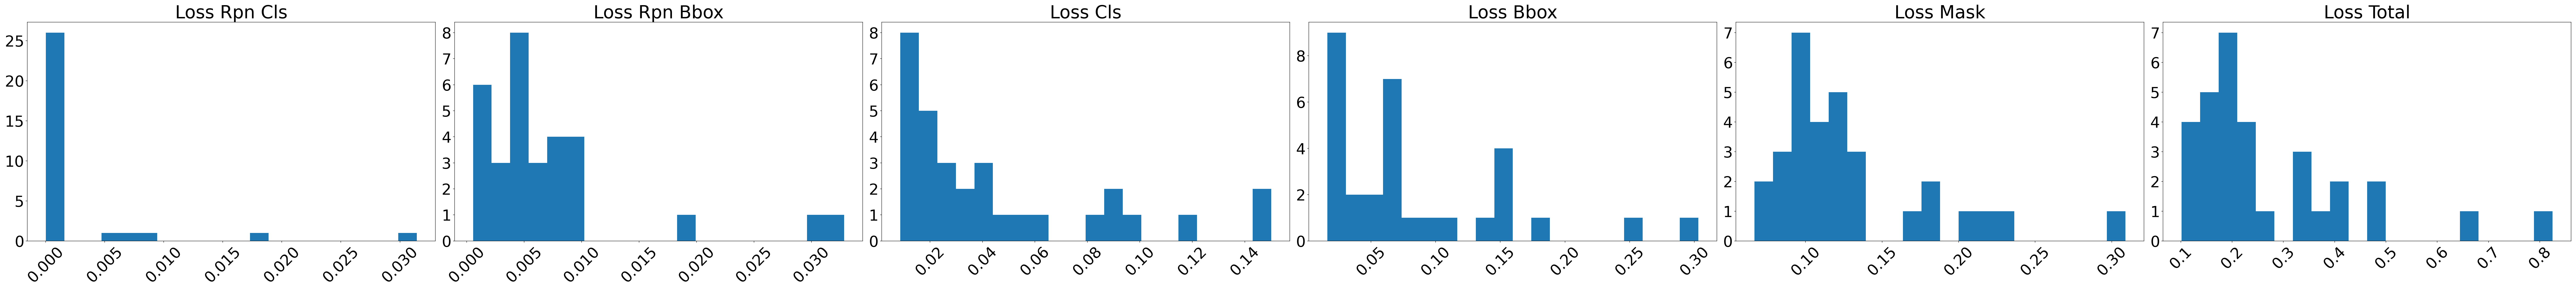
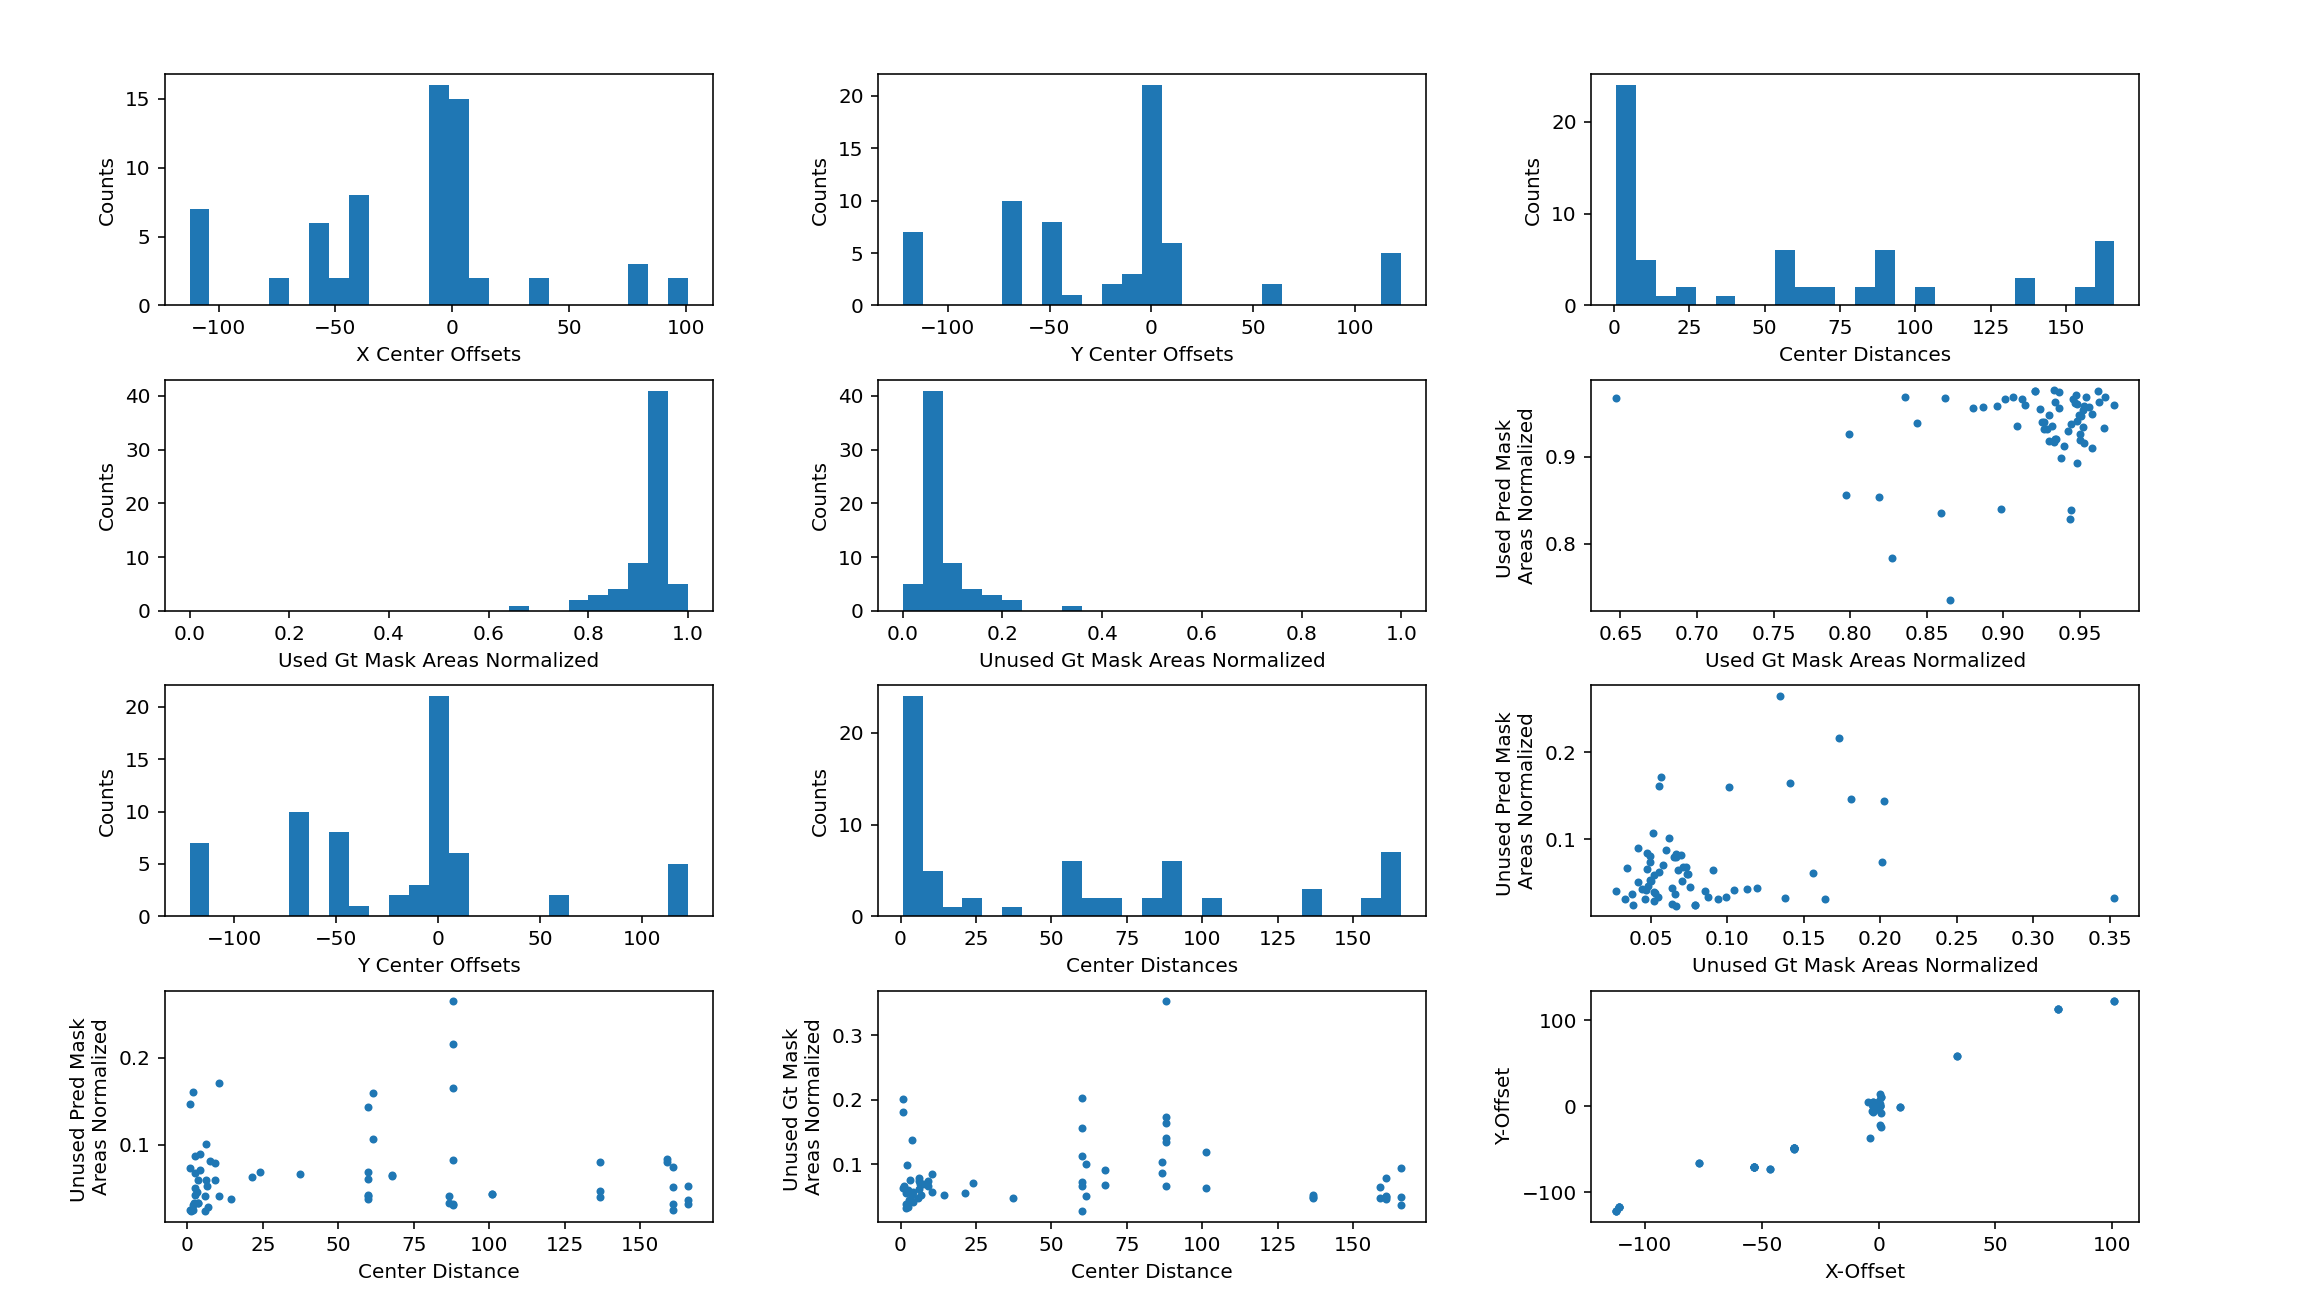
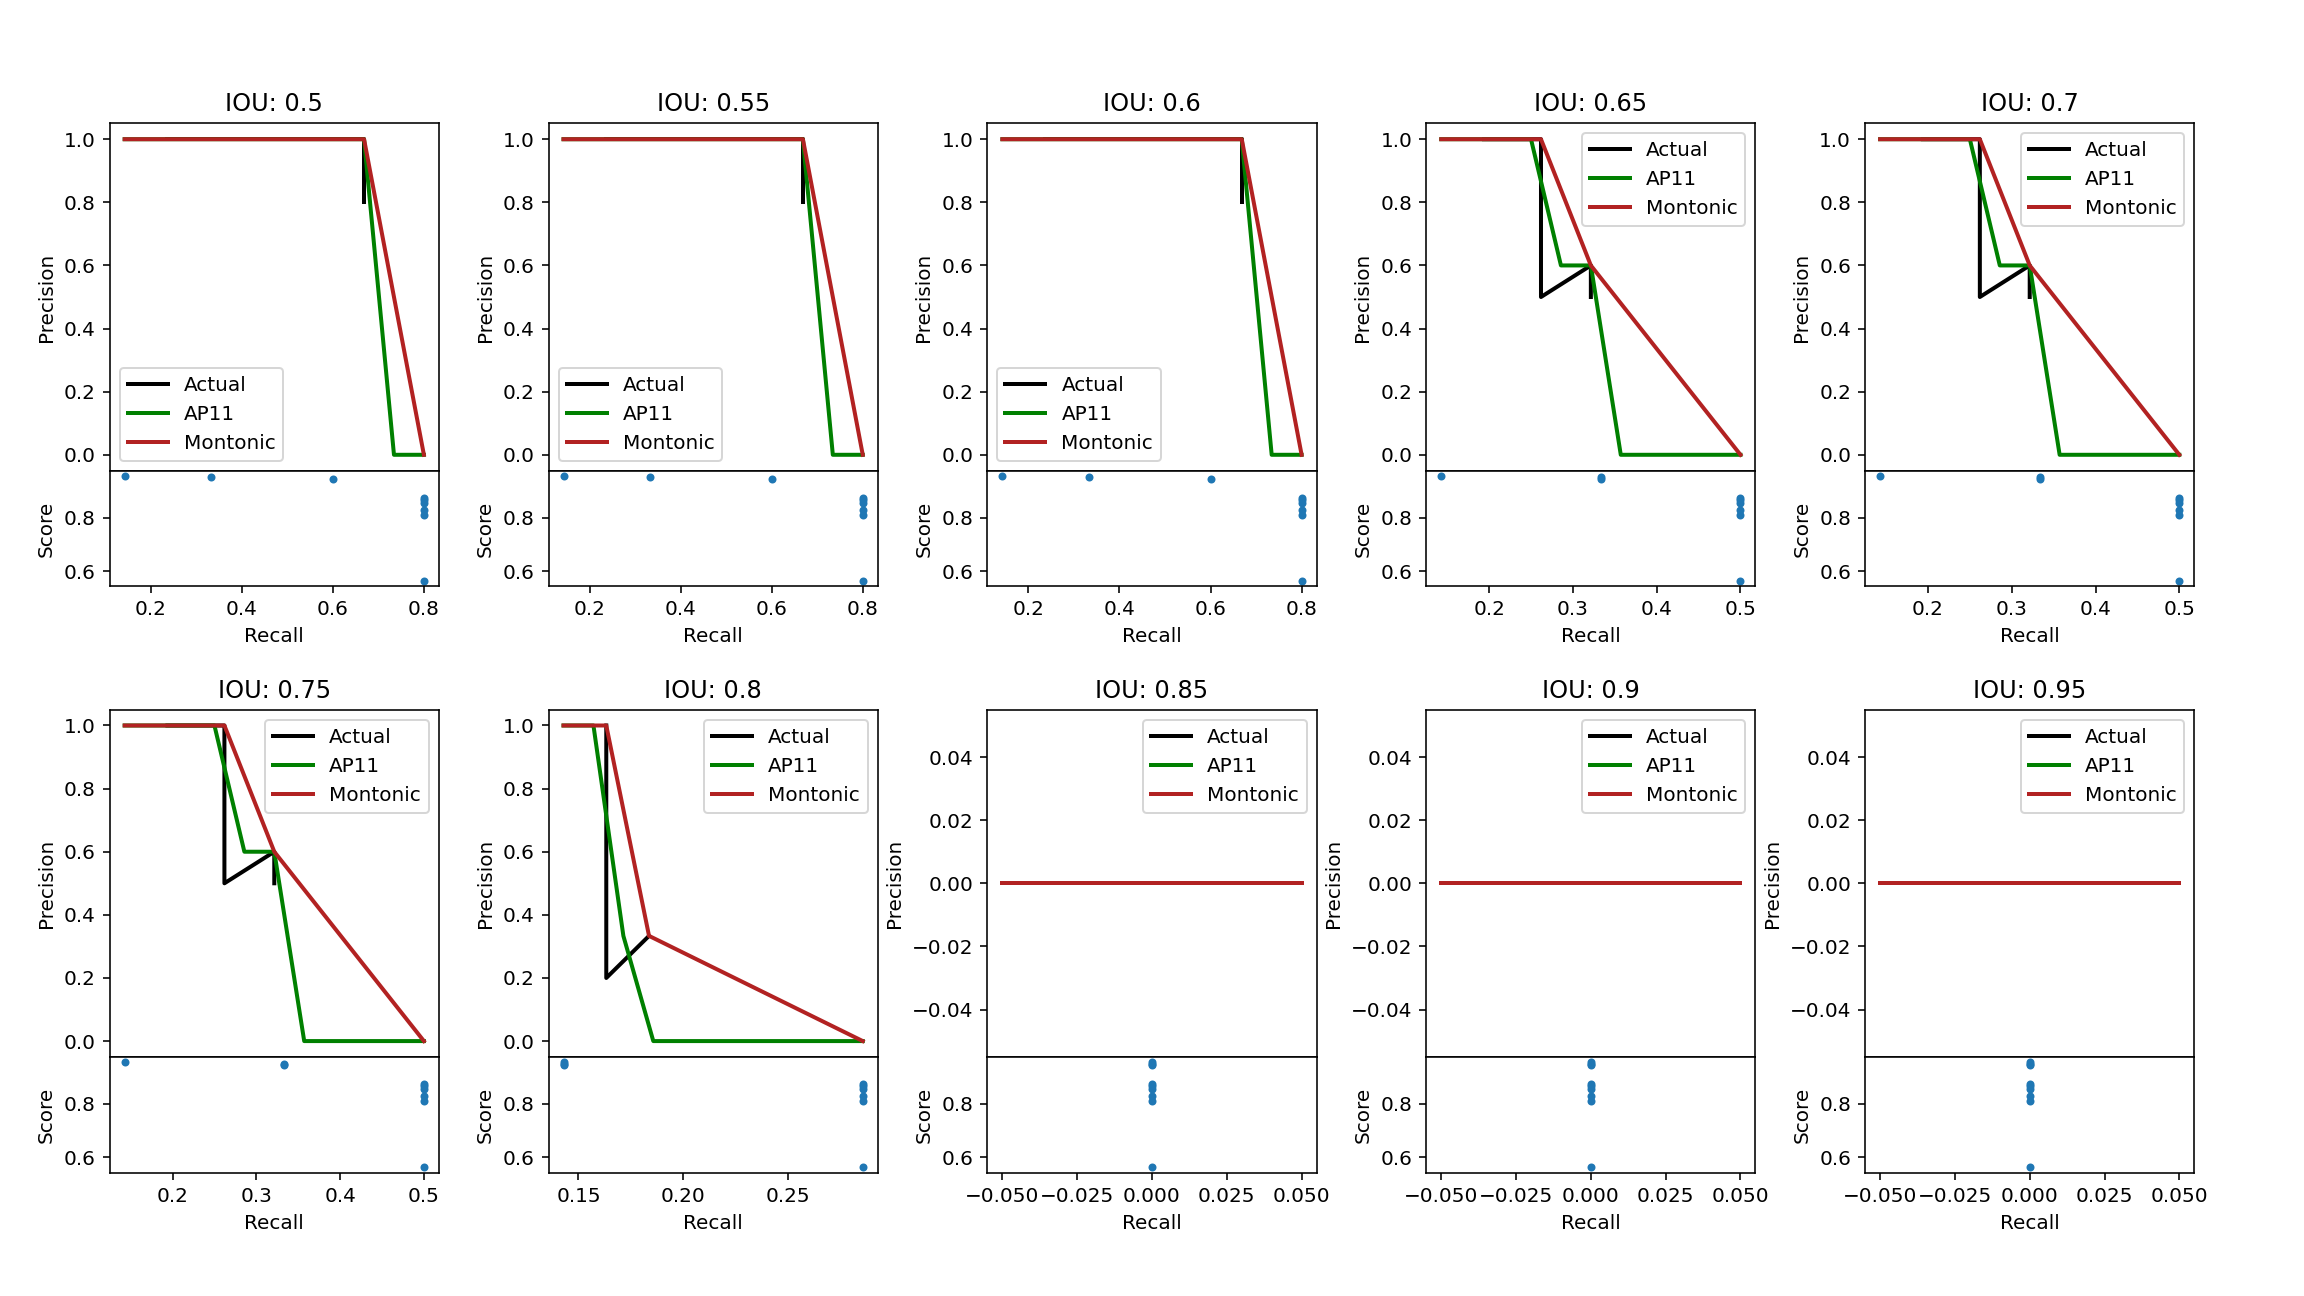
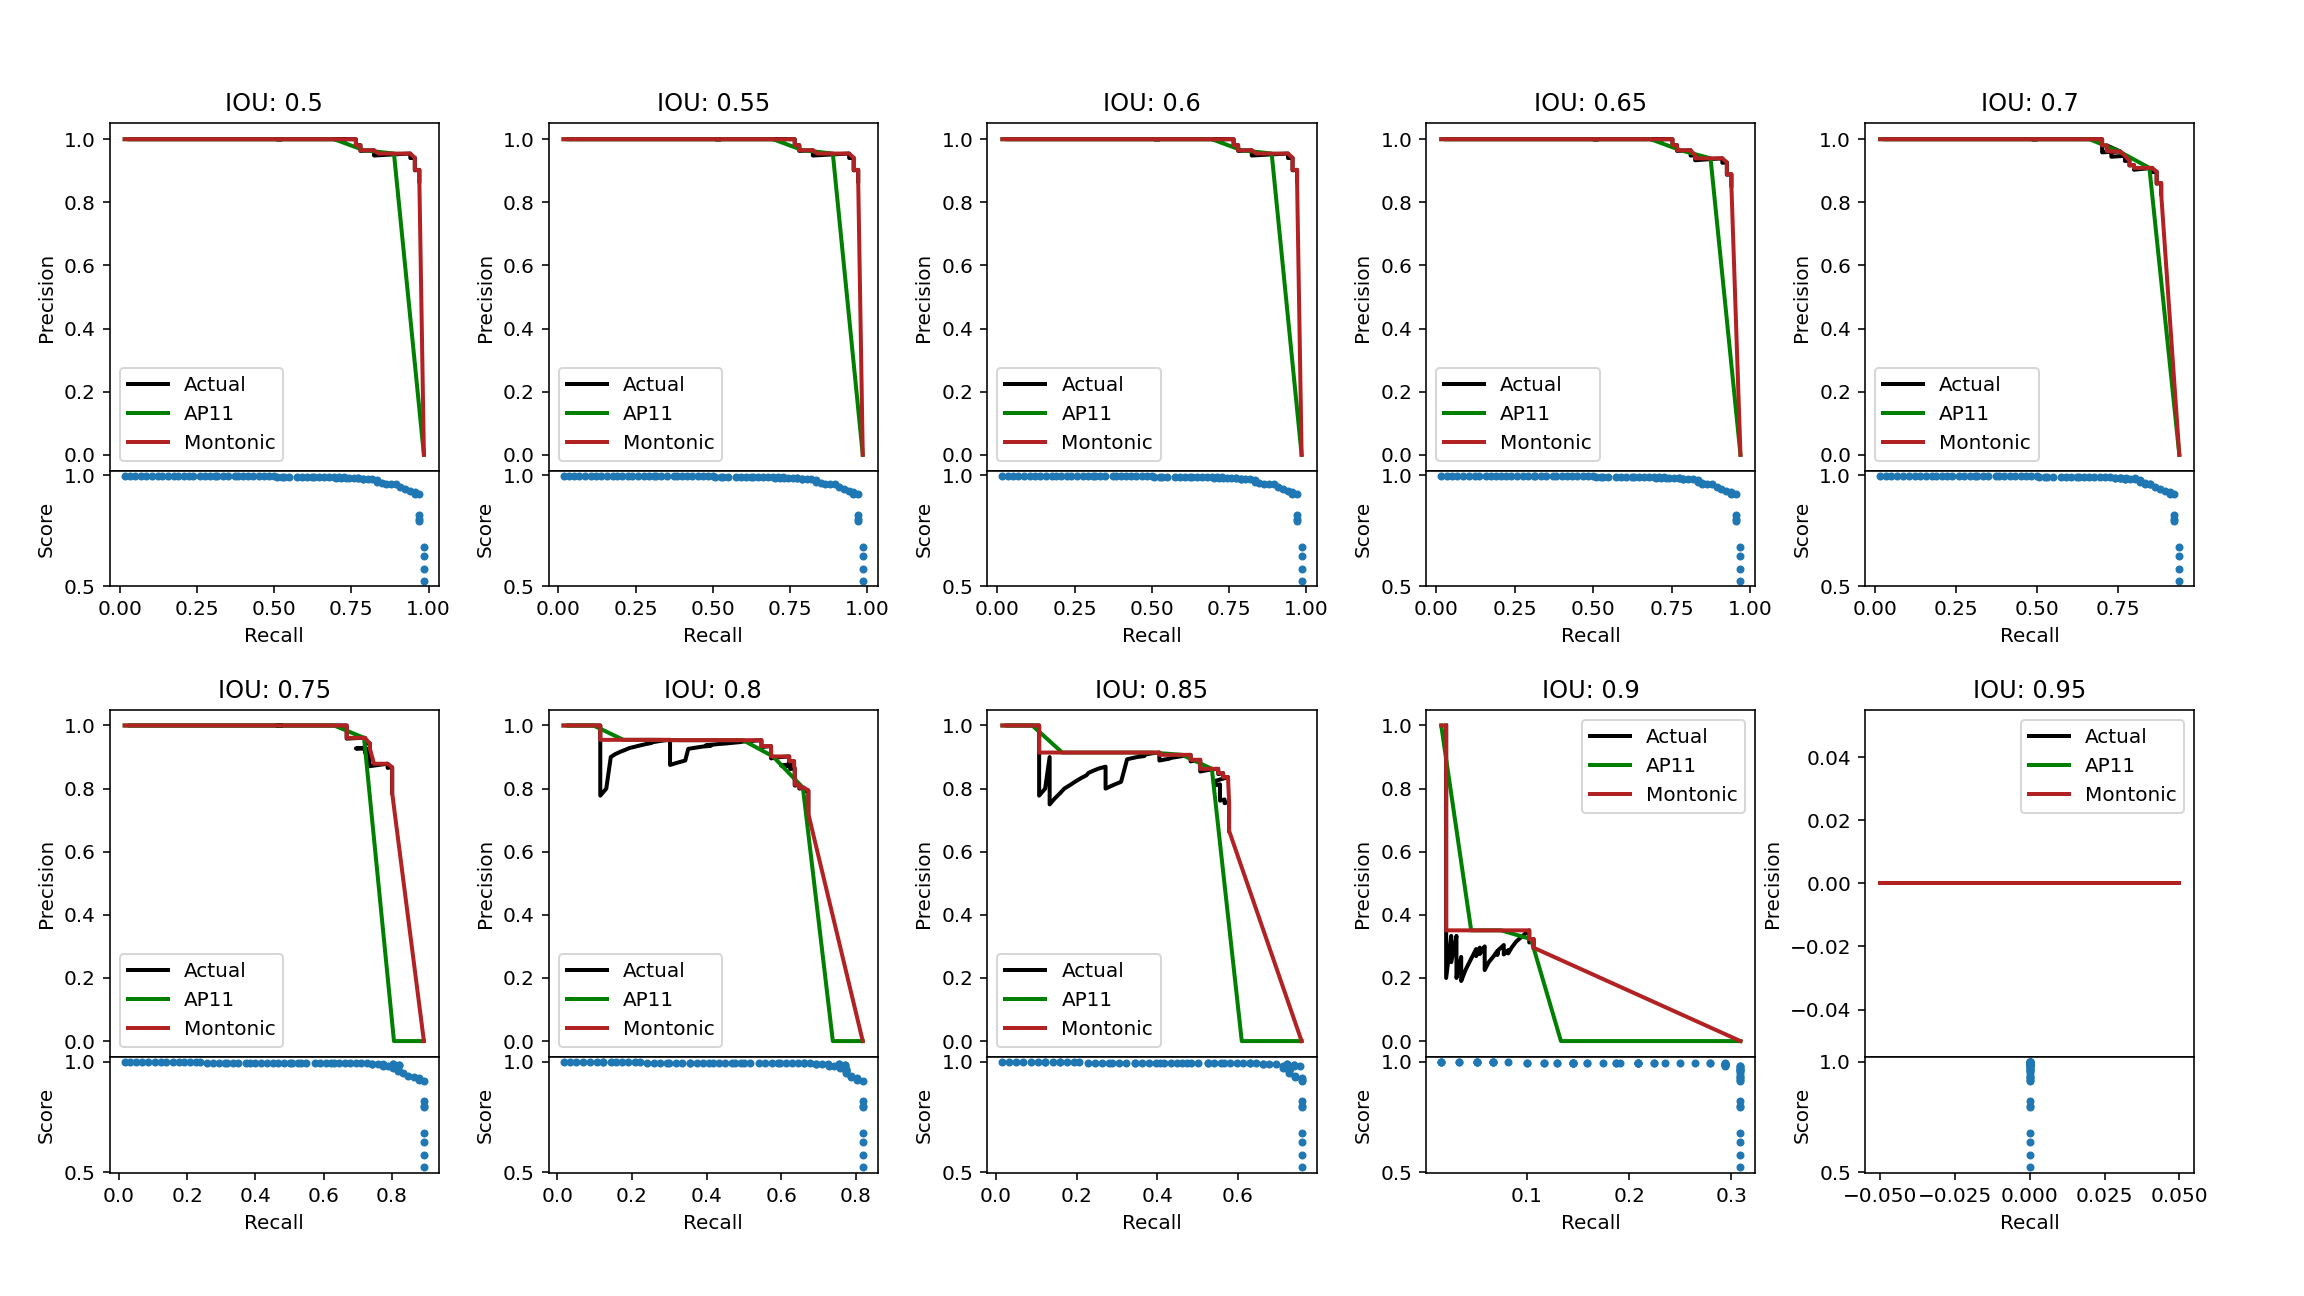
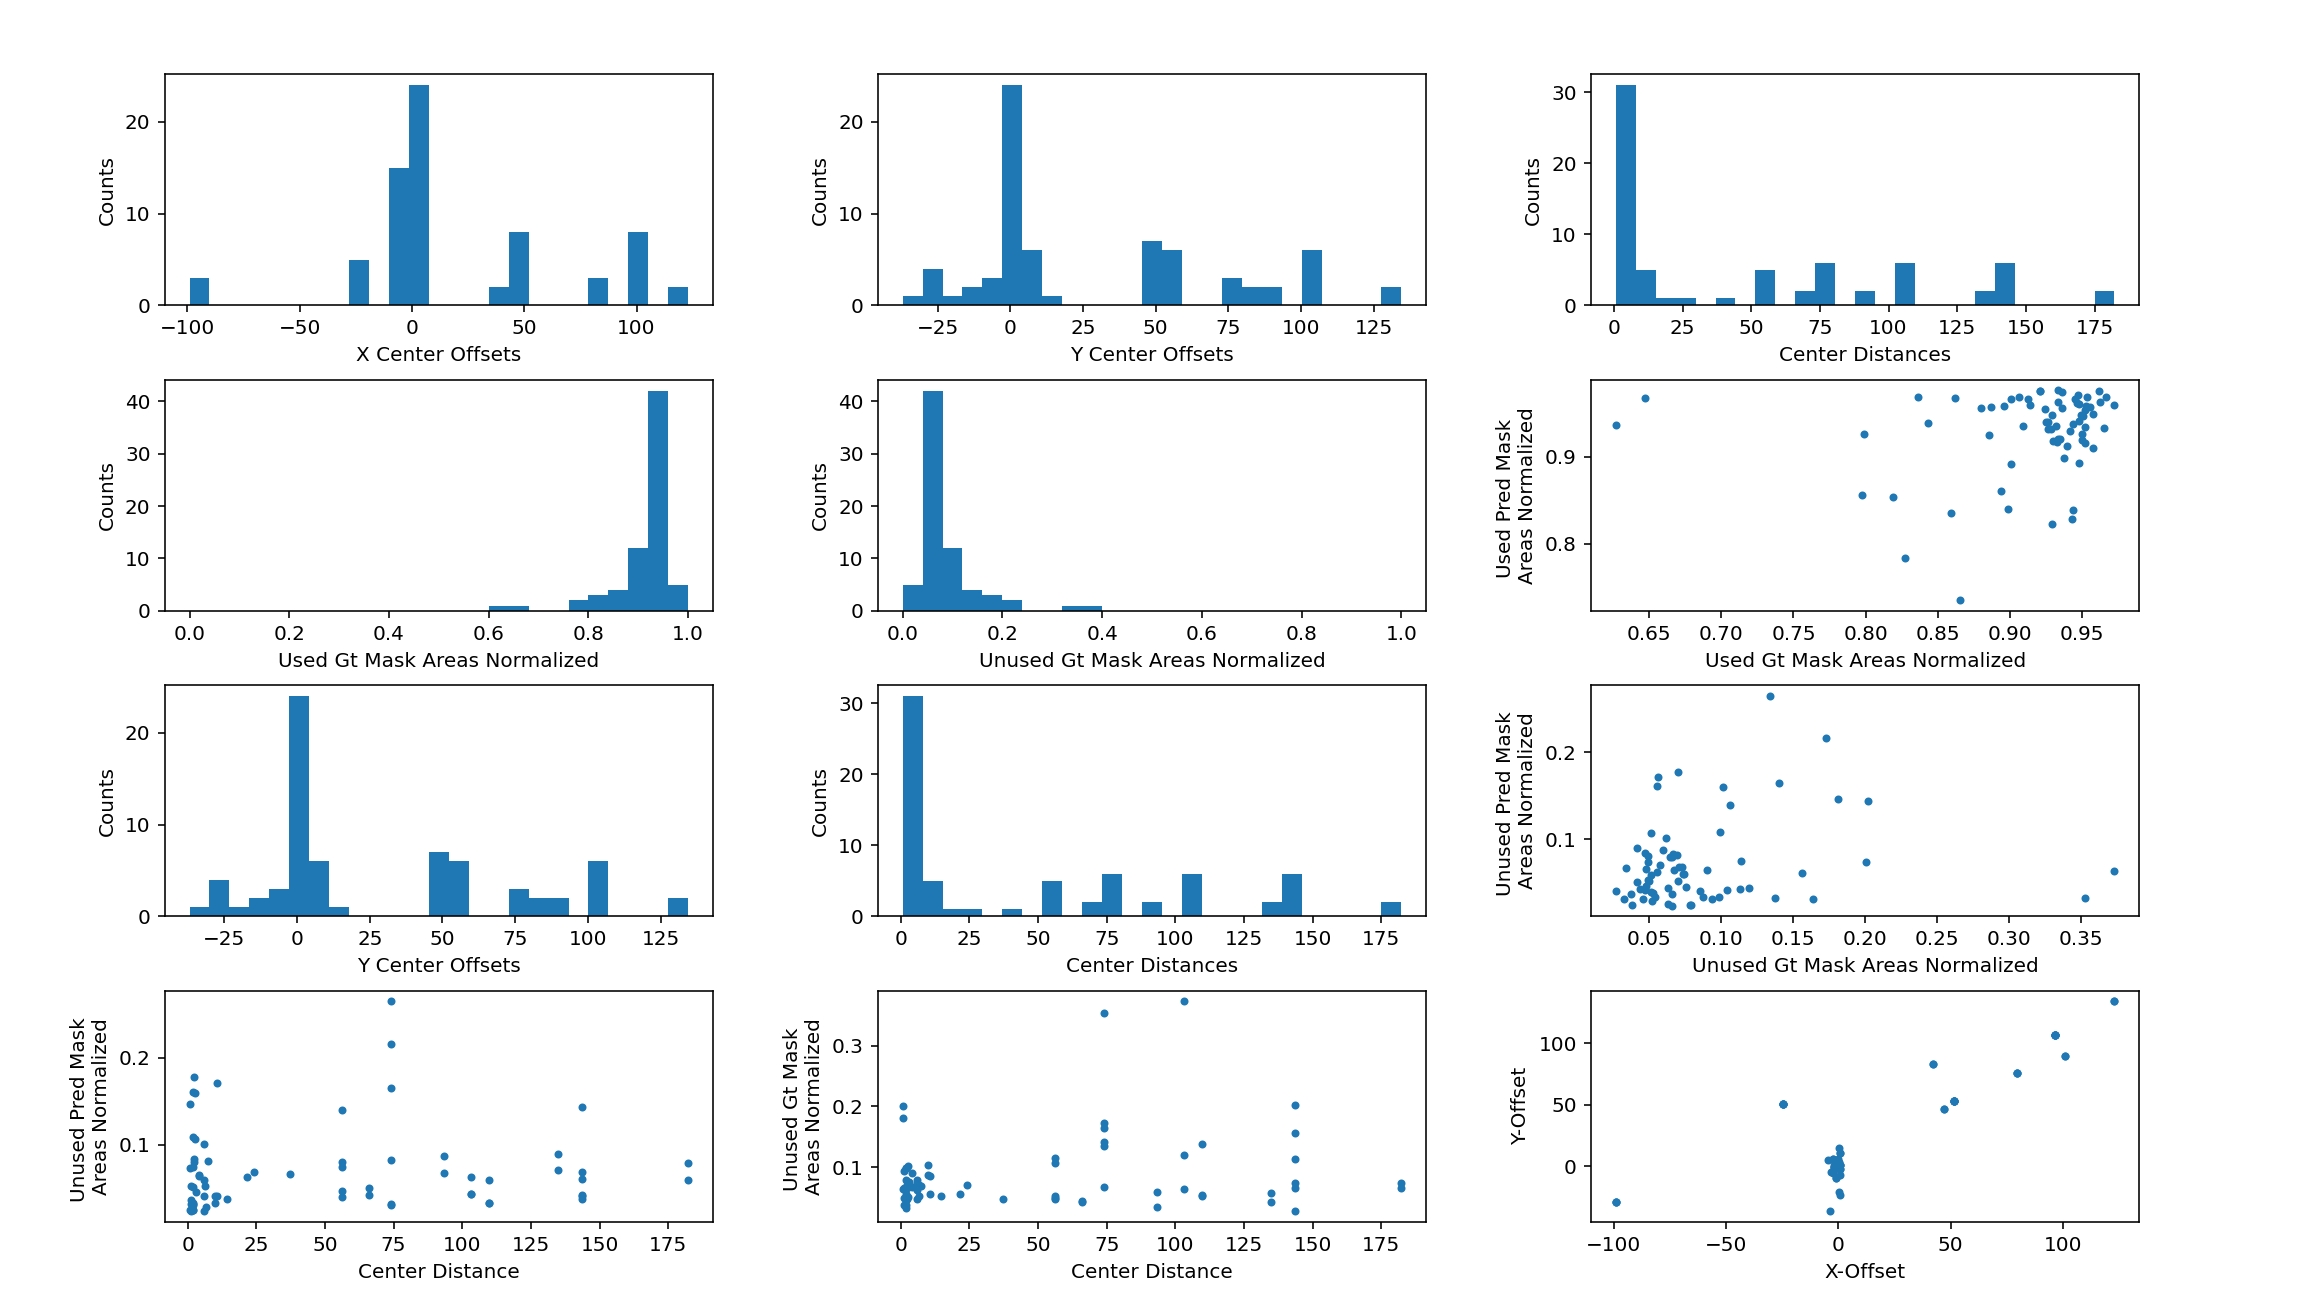
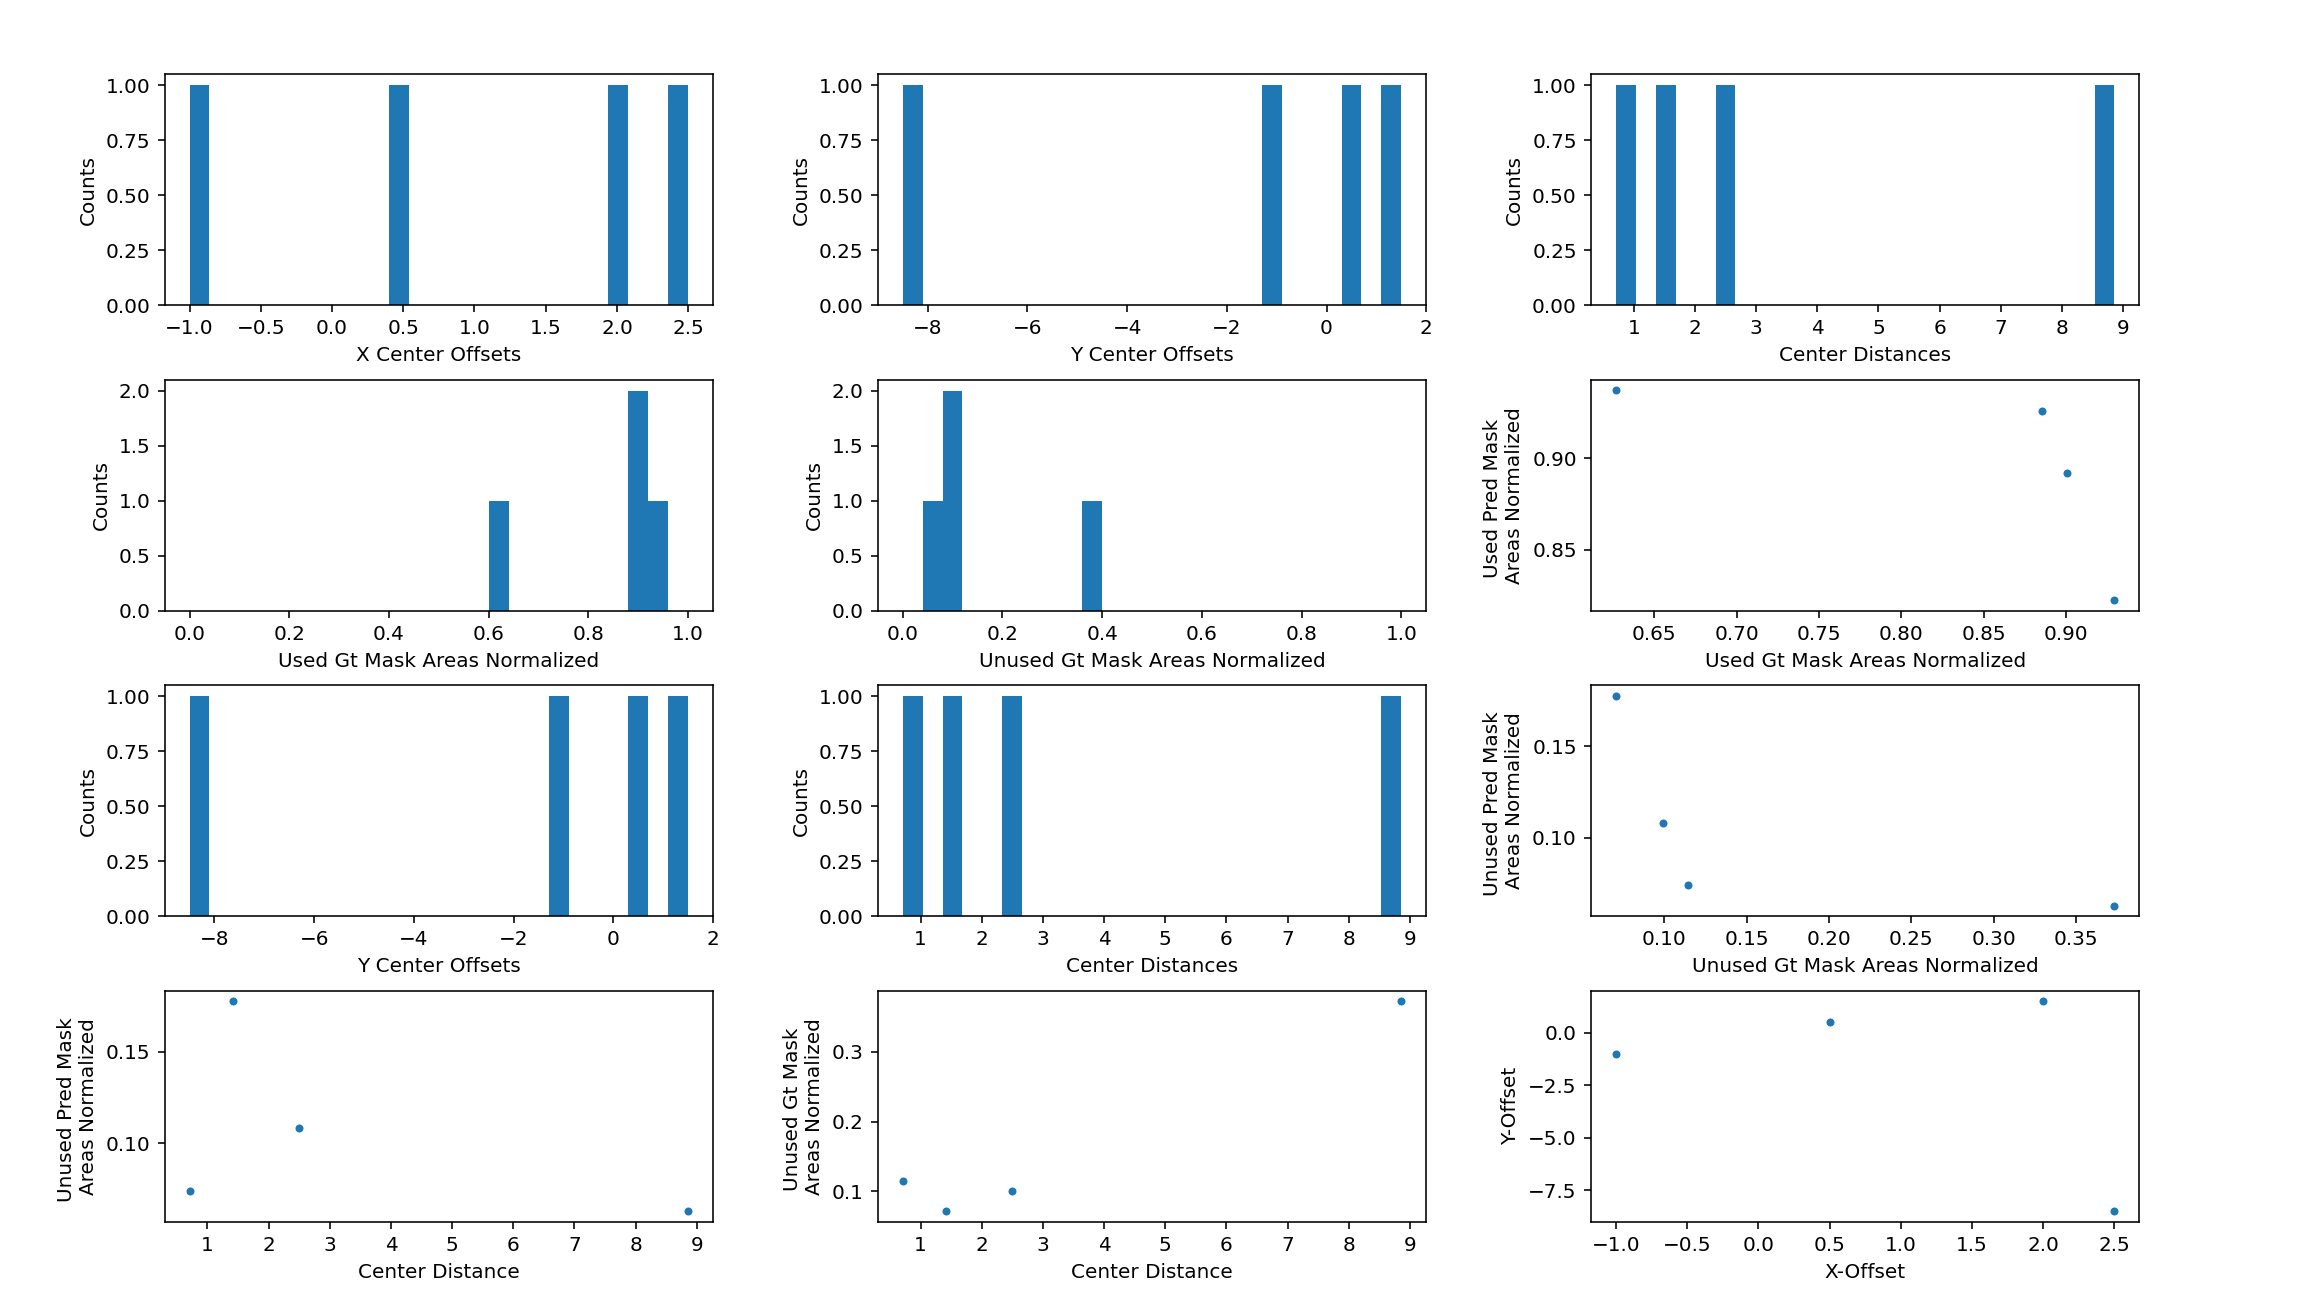
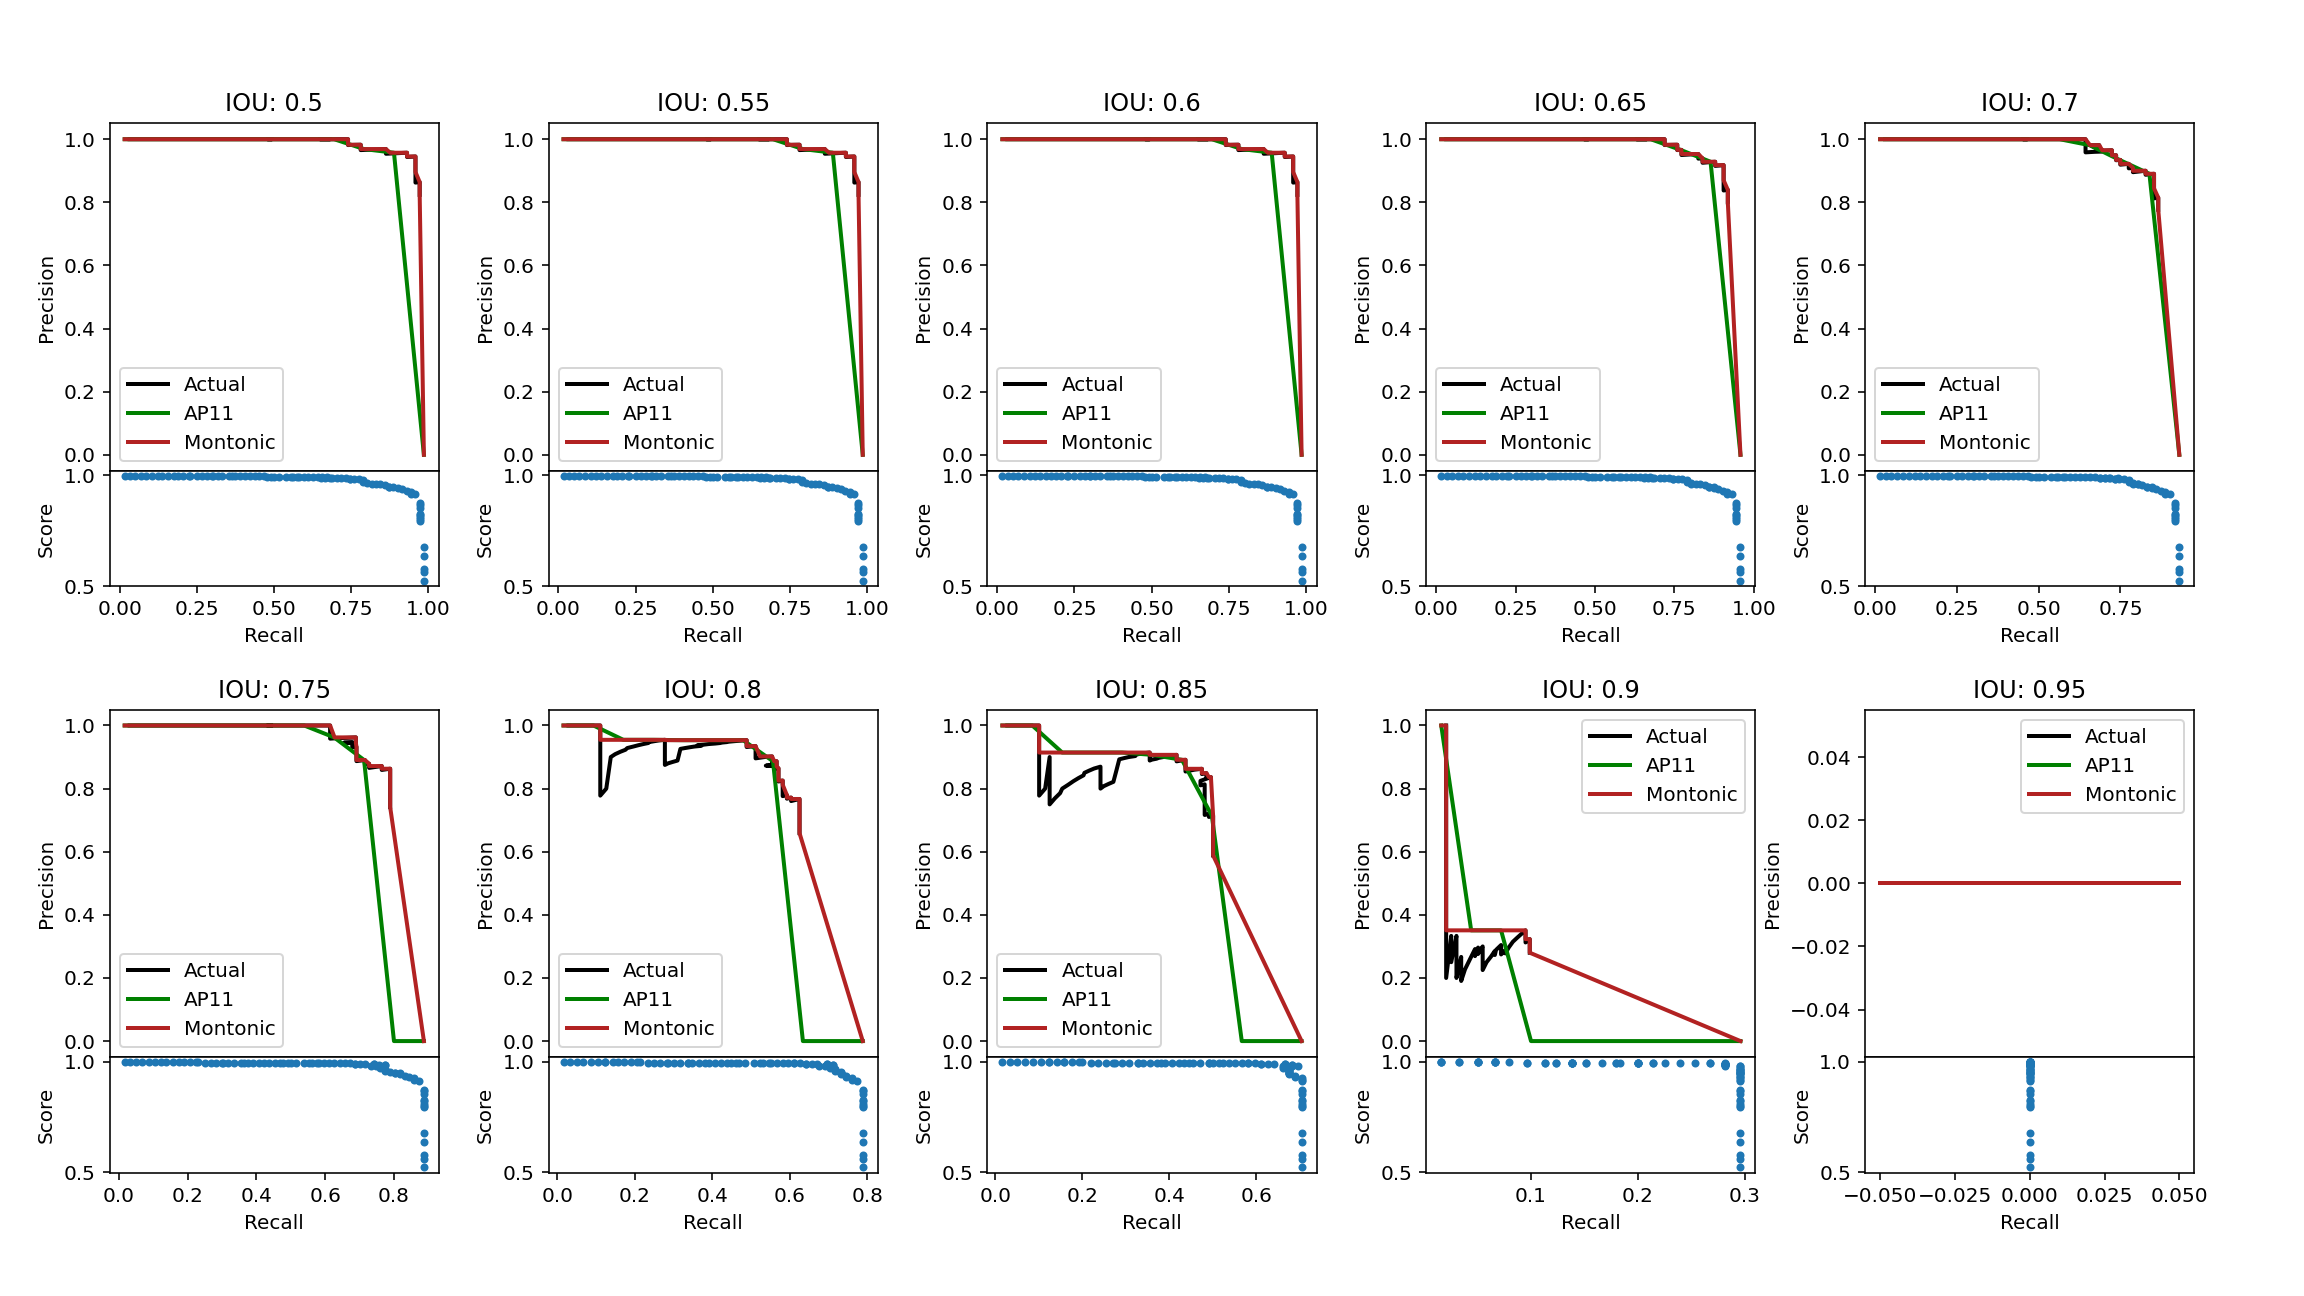

In [18]:
# show the results in a dashboard
result_overview_dash = InstanceSegmentationResultOverview(valid_result_ds, width=1500)
result_overview_dash.show()

Because the recalculation of the layout can take some time the two main tabs can also be shown independenly which given a better performance for the interative plots. Make sure that you clear the output from the cell that shows the full dashboard, because the dashboards are the same and an update to one also transfers to the other.

In [19]:
# only show the loss tab
# result_overview_dash.show_loss_tab()

In [20]:
# only show the ap tab
# result_overview_dash.show_ap_tab()